<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2019-2020/CursPython/18_Libreria_Pandas_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librería Pandas**

*Pandas* es una librería de Python que proporciona estructuras de datos rápidas y flexibles diseñadas para facilitar el trabajo con datos "relacionales" o "etiquetados", de forma muy intuitiva. Es una de las herramientas de análisis y manipulación de datos de código abierto más potente y flexible disponible en Python.

*Pandas* es muy adecuado para muchos tipos diferentes de datos:

* Datos tabulares con columnas y files, como una tabla SQL u hoja de cálculo Excel

* Datos de series de tiempo ordenados y no ordenados (no necesariamente de frecuencia fija).

* Datos de matriz arbitraria (de tipo homogéneo o heterogéneo) con etiquetas de fila y columna

* Cualquier otra forma de conjuntos de datos observacionales / estadísticos. En realidad, no es necesario etiquetar los datos para colocarlos en una estructura de datos de pandas

Existen dos estructuras de datos primarias en *Pandas*: **Series** (1-dimensional) y **DataFrame** (2-dimensional). *Pandas* está construido sobre la librería de Python *NumPy*, y los cálculos son realmente rápidos.

En *Pandas* es muy fácil insertar/eliminar columnas de un *DataFrame*, añadir etiquetas y alinear por etiquetas, ordenar por fila o tipo de dato, transformar datos, hacer selecciones de datos (subconjuntos), exportar/importar datos (formatos csv, por ejemplo, y muchos otros), etc...

La documentación de *Pandas* se encuentra en: https://pandas.pydata.org/

# **Series**

Vamos a importar *Pandas* y generar una *Serie* para manipularla: 

In [0]:
import numpy as np
import pandas as pd

s = pd.Series([1, 3, 5, np.nan, 6, 8])

print(s)
s.dtypes

s.count()


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


5

Hemos creado una *Serie* de números en *Pandas*, que son de tipo float64. Cada número tiene asignado un índice, de 0 a 5.

Podemos cambiar los índices y darles un identificador:

In [0]:
b = pd.Series([1, np.nan, 1, np.nan], index=['a', 'b', 'd', 'e'])
print(b)

a    1.0
b    NaN
d    1.0
e    NaN
dtype: float64


Tenemos diferentes funciones que pueden ser aplicadas a una *Serie*. Veamos *cov* que nos calcula la covariancia entre dos listas de elementos:

In [0]:
s1 = pd.Series([0.90010907, 0.13484424, 0.62036035])
s2 = pd.Series([0.12528585, 0.26962463, 0.51111198])
print(s1.cov(s2))

-0.01685762652715874


# **DataFrames**

Vamos ahora a crear un *DataFrame* pasando una matriz *NumPy*, con un índice de fecha y hora y columnas etiquetadas:

In [0]:
dates = pd.date_range('20130101', periods=6) # Fija la fecha inicial y nos hace un rango creciente de 6 días.
print(dates)

print("\n**************\n")

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD')) # Creamos un DataFrame
# np.random.randn(6, 4) nos genera una matriz 6x4 de números aleatorios que siguen una distribución normal m=0, sigma = 1 (https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html)
# Los índices fijamos que sean las fechas que hemos creado antes
# A cada columna le damos un tag "A, B, C, D"
print(df)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

**************

                   A         B         C         D
2013-01-01 -0.643726  0.156248 -1.311014  0.772711
2013-01-02 -1.493739 -0.040198  0.018233 -0.141422
2013-01-03 -0.112212  1.324594  0.496449 -0.556671
2013-01-04  1.294945 -0.152485 -1.289036  0.928768
2013-01-05  1.689409 -0.734930 -0.206794 -0.024526
2013-01-06  0.127879  0.683692  0.777480 -1.841733


**Visualización**

Vamos a ver algunas funciones que podemos aplicar a un *DataFrame* para visualizar sus contenidos. Esto es importante, por ejemplo, cuando importamos valores desde un fichero csv (Excel):

In [0]:
print(df.head()) # Nos da las primeras 5 filas
print(df.tail()) # Nos da las últimas 5 filas

# Sin usar la función print, los DataFrames se pueden visualizar muy bien en el Notebook

df.head()

                   A         B         C         D
2013-01-01 -0.643726  0.156248 -1.311014  0.772711
2013-01-02 -1.493739 -0.040198  0.018233 -0.141422
2013-01-03 -0.112212  1.324594  0.496449 -0.556671
2013-01-04  1.294945 -0.152485 -1.289036  0.928768
2013-01-05  1.689409 -0.734930 -0.206794 -0.024526
                   A         B         C         D
2013-01-02 -1.493739 -0.040198  0.018233 -0.141422
2013-01-03 -0.112212  1.324594  0.496449 -0.556671
2013-01-04  1.294945 -0.152485 -1.289036  0.928768
2013-01-05  1.689409 -0.734930 -0.206794 -0.024526
2013-01-06  0.127879  0.683692  0.777480 -1.841733


,A,B,C,D
2013-01-01,-0.643726,0.156248,-1.311014,0.772711
2013-01-02,-1.493739,-0.040198,0.018233,-0.141422
2013-01-03,-0.112212,1.324594,0.496449,-0.556671
2013-01-04,1.294945,-0.152485,-1.289036,0.928768
2013-01-05,1.689409,-0.734930,-0.206794,-0.024526


In [0]:
# También podemos ver cuantas columnas tenemos, y los índices

print(df.columns)
print(df.index)

Index(['A', 'B', 'C', 'D'], dtype='object')
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


Podemos también obtener información estadística de un set de datos en un *DataFrame* usando la función *describe* o *mean()*:

In [0]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.143759,0.206153,-0.252447,-0.143812
std,1.190090,0.715037,0.882273,1.005790
min,-1.493739,-0.734930,-1.311014,-1.841733
25%,-0.510847,-0.124413,-1.018475,-0.452859
50%,0.007833,0.058025,-0.094280,-0.082974
75%,1.003178,0.551831,0.376895,0.573401
max,1.689409,1.324594,0.777480,0.928768


In [0]:
df.mean()

A    0.143759
B    0.206153
C   -0.252447
D   -0.143812
dtype: float64

También es muy fácil ordenar por índice o por valor de columna. Veamos:

In [0]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.772711,-1.311014,0.156248,-0.643726
2013-01-02,-0.141422,0.018233,-0.040198,-1.493739
2013-01-03,-0.556671,0.496449,1.324594,-0.112212
2013-01-04,0.928768,-1.289036,-0.152485,1.294945
2013-01-05,-0.024526,-0.206794,-0.734930,1.689409
2013-01-06,-1.841733,0.777480,0.683692,0.127879


In [0]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,1.689409,-0.734930,-0.206794,-0.024526
2013-01-04,1.294945,-0.152485,-1.289036,0.928768
2013-01-02,-1.493739,-0.040198,0.018233,-0.141422
2013-01-01,-0.643726,0.156248,-1.311014,0.772711
2013-01-06,0.127879,0.683692,0.777480,-1.841733
2013-01-03,-0.112212,1.324594,0.496449,-0.556671


**Filtrado de valores**

Vamos a ver como filtramos un *DataFrame* para seleccionar un cierto tipo de datos.

Seleccionamos una columna concreta de esta manera:

In [0]:
df['A']

2013-01-01   -0.643726
2013-01-02   -1.493739
2013-01-03   -0.112212
2013-01-04    1.294945
2013-01-05    1.689409
2013-01-06    0.127879
Freq: D, Name: A, dtype: float64

Podemos seleccionar un número concreto de filas:


In [0]:
df[0:3]

,A,B,C,D
2013-01-01,-0.643726,0.156248,-1.311014,0.772711
2013-01-02,-1.493739,-0.040198,0.018233,-0.141422
2013-01-03,-0.112212,1.324594,0.496449,-0.556671


También podemos seleccionar datos de un *DataFrame* usando etiquetas. Veamos:

In [0]:
df.loc[dates[0]] # Nos selecciona los valores de una fecha concreta

A   -0.643726
B    0.156248
C   -1.311014
D    0.772711
Name: 2013-01-01 00:00:00, dtype: float64

In [0]:
df.loc[:, ['A', 'B']] # Nos selecciona los valores de 'A' y 'B' para todas las fechas

,A,B
2013-01-01,-0.643726,0.156248
2013-01-02,-1.493739,-0.040198
2013-01-03,-0.112212,1.324594
2013-01-04,1.294945,-0.152485
2013-01-05,1.689409,-0.734930
2013-01-06,0.127879,0.683692


In [0]:
df.loc['20130102':'20130104', ['A', 'B']] # Nos selecciona los valores de 'A' y 'B' para un intervalo de fechas

,A,B
2013-01-02,-1.493739,-0.040198
2013-01-03,-0.112212,1.324594
2013-01-04,1.294945,-0.152485


In [0]:
df.loc['20130102', ['A', 'B']] # Nos selecciona los valores de 'A' y 'B' para una fecha concreta

A   -1.493739
B   -0.040198
Name: 2013-01-02 00:00:00, dtype: float64

In [0]:
print(df.loc[dates[0], 'A']) # Nos devuelve el valor que corresponde a 'A' y una fecha concreta
print(df.at[dates[0], 'A']) # Lo mismo, pero esta función es más rápida, sobretodo cuando se manipulan DataFrames grandes

-0.6437258904716875
-0.6437258904716875


También se puede seleccionar por posición, sin usar los valores o índices, con la función *iloc*. Veamos un par de ejemplos:

In [0]:
df.iloc[3]

A    1.294945
B   -0.152485
C   -1.289036
D    0.928768
Name: 2013-01-04 00:00:00, dtype: float64

In [0]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.294945,-0.152485
2013-01-05,1.689409,-0.734930


También podemos usar condiciones para filtrar valores. Por ejemplo:

In [0]:
df[df['A'] > 0] # Devuelve todos los días en los que los valores en 'A' son >0

,A,B,C,D
2013-01-04,1.294945,-0.152485,-1.289036,0.928768
2013-01-05,1.689409,-0.734930,-0.206794,-0.024526
2013-01-06,0.127879,0.683692,0.777480,-1.841733


También podemos usar la función *isin()*, muy poderosa para filtrar sets de datos:

In [0]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

print(df2)

df2[df2['E'].isin(['two', 'four'])]

                   A         B         C         D      E
2013-01-01 -0.643726  0.156248 -1.311014  0.772711    one
2013-01-02 -1.493739 -0.040198  0.018233 -0.141422    one
2013-01-03 -0.112212  1.324594  0.496449 -0.556671    two
2013-01-04  1.294945 -0.152485 -1.289036  0.928768  three
2013-01-05  1.689409 -0.734930 -0.206794 -0.024526   four
2013-01-06  0.127879  0.683692  0.777480 -1.841733  three


,A,B,C,D,E
2013-01-03,-0.112212,1.324594,0.496449,-0.556671,two
2013-01-05,1.689409,-0.734930,-0.206794,-0.024526,four


**Modificación**

Podemos también modificar el contenido de alguno de los valores de un *DataFrame*. 

In [0]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D
2013-01-01,0.000000,0.156248,-1.311014,0.772711
2013-01-02,-1.493739,-0.040198,0.018233,-0.141422
2013-01-03,-0.112212,1.324594,0.496449,-0.556671
2013-01-04,1.294945,-0.152485,-1.289036,0.928768
2013-01-05,1.689409,-0.734930,-0.206794,-0.024526
2013-01-06,0.127879,0.683692,0.777480,-1.841733


También se puede hacer por posición:

In [0]:
df.iat[0, 1] = 0
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.311014,0.772711
2013-01-02,-1.493739,-0.040198,0.018233,-0.141422
2013-01-03,-0.112212,1.324594,0.496449,-0.556671
2013-01-04,1.294945,-0.152485,-1.289036,0.928768
2013-01-05,1.689409,-0.734930,-0.206794,-0.024526
2013-01-06,0.127879,0.683692,0.777480,-1.841733


**Aplicar funciones**

Esto es realmente muy útil para aplicar funciones concretas a los valores de un *DataFrame*



In [0]:
print(df)
df.apply(np.cumsum) # Esto va haciendo una función cumulativa de los datos, día a día en este caso...

                   A         B         C         D
2013-01-01  0.000000  0.000000 -1.311014  0.772711
2013-01-02 -1.493739 -0.040198  0.018233 -0.141422
2013-01-03 -0.112212  1.324594  0.496449 -0.556671
2013-01-04  1.294945 -0.152485 -1.289036  0.928768
2013-01-05  1.689409 -0.734930 -0.206794 -0.024526
2013-01-06  0.127879  0.683692  0.777480 -1.841733


,A,B,C,D
2013-01-01,0.000000,0.000000,-1.311014,0.772711
2013-01-02,-1.493739,-0.040198,-1.292781,0.631289
2013-01-03,-1.605951,1.284395,-0.796332,0.074618
2013-01-04,-0.311006,1.131910,-2.085368,1.003386
2013-01-05,1.378403,0.396981,-2.292161,0.978860
2013-01-06,1.506282,1.080673,-1.514681,-0.862873


También podemos usar la función lambda para aplicar la función que queramos:

In [0]:
df.apply(lambda x: x.max() - x.min())

A    3.183149
B    2.059523
C    2.088494
D    2.770501
dtype: float64

In [0]:
df.apply(lambda x: np.sin(x))

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.966446,0.698079
2013-01-02,-0.997033,-0.040188,0.018232,-0.140951
2013-01-03,-0.111976,0.969845,0.476306,-0.528363
2013-01-04,0.962194,-0.151895,-0.960567,0.800883
2013-01-05,0.992974,-0.670535,-0.205323,-0.024524
2013-01-06,0.127531,0.631660,0.701486,-0.963521


In [0]:
df.apply(lambda x: x+10.)

,A,B,C,D
2013-01-01,10.000000,10.000000,8.688986,10.772711
2013-01-02,8.506261,9.959802,10.018233,9.858578
2013-01-03,9.887788,11.324594,10.496449,9.443329
2013-01-04,11.294945,9.847515,8.710964,10.928768
2013-01-05,11.689409,9.265070,9.793206,9.975474
2013-01-06,10.127879,10.683692,10.777480,8.158267


## **Series temporales**

*Pandas* tiene una funcionalidad simple, potente y eficiente para realizar operaciones de remuestreo de datos obtenidos con cierta frecuencia (por ejemplo, convertir datos obtenidos cada segundo en datos en intervalos de 5 minutos).

In [0]:
rng = pd.date_range('1/1/2012', periods=1000, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.head
ts.tail

<bound method NDFrame.tail of 2012-01-01 00:00:00    195
2012-01-01 00:00:01     94
2012-01-01 00:00:02    455
2012-01-01 00:00:03    453
2012-01-01 00:00:04    208
                      ... 
2012-01-01 00:16:35    449
2012-01-01 00:16:36    413
2012-01-01 00:16:37    210
2012-01-01 00:16:38    113
2012-01-01 00:16:39    268
Freq: S, Length: 1000, dtype: int64>

In [0]:
print(ts.resample('5Min').sum())

print(ts.resample('5Min').mean())

2012-01-01 00:00:00    78513
2012-01-01 00:05:00    76767
2012-01-01 00:10:00    73710
2012-01-01 00:15:00    25167
Freq: 5T, dtype: int64
2012-01-01 00:00:00    261.71
2012-01-01 00:05:00    255.89
2012-01-01 00:10:00    245.70
2012-01-01 00:15:00    251.67
Freq: 5T, dtype: float64


A veces es interesante modificar la fecha (timestamp) de una medida, para ponerlas todas a escala. Por ejemplo, imagina que toma una temperatura por mes, no importa qué dia, pero que quieres hacer una gráfica en la que aparezcan los meses, no el día concreto:

In [0]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.793652
2012-02-29   -0.903128
2012-03-31    0.168486
2012-04-30   -1.067748
2012-05-31    1.027077
Freq: M, dtype: float64

In [0]:
ps = ts.to_period()
ps

2012-01   -0.793652
2012-02   -0.903128
2012-03    0.168486
2012-04   -1.067748
2012-05    1.027077
Freq: M, dtype: float64

In [0]:
ps.to_timestamp() # Podemos convertirlo al primer día del mes

2012-01-01   -0.793652
2012-02-01   -0.903128
2012-03-01    0.168486
2012-04-01   -1.067748
2012-05-01    1.027077
Freq: MS, dtype: float64

# **Gráficas**

De forma análoga, se pueden hacer gráficas con *Pandas*. Pandas, de forma directa tiene implementada la funcionalidad de hacer gráficas. 

Por ejemplo, vamos a hacer una gráfica de una série temporal:

In [0]:
import matplotlib.pyplot as plt
plt.close('all')

2000-01-01   -0.390454
2000-01-02   -0.425650
2000-01-03    1.147311
2000-01-04   -0.403884
2000-01-05   -0.450742
Freq: D, dtype: float64
2000-01-01   -0.390454
2000-01-02   -0.816105
2000-01-03    0.331206
2000-01-04   -0.072678
2000-01-05   -0.523421
Freq: D, dtype: float64


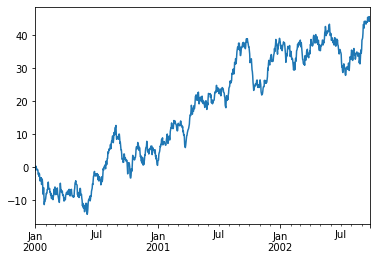

In [0]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
print(ts.head())
ts = ts.cumsum()
print(ts.head())
ts.plot()

En un *DataFrame*, la función o métodos *plot()* es muy conveniente para dibujar todas las columnas de un *DataFrame* con sus correspondientes etiquetas:

                   A         B         C         D
2000-01-01 -1.066012  0.757140 -0.372255  0.250946
2000-01-02 -0.675918 -1.464375 -0.905420 -0.888074
2000-01-03 -0.741901  1.031200  0.061503  0.050486
2000-01-04  0.930638  0.187858 -0.648056  2.179294
2000-01-05  1.653167  1.141672  0.477946  0.220536


<Figure size 432x288 with 0 Axes>

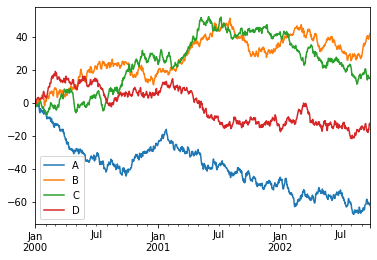

In [0]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
print(df.head())

df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

# **Leer datos IN/OUT**

Podemos leer datos y escribir datos en ficheros. Pensad que estáis ejecutando en la nube, en un entorno de Google Cloud. Es posible acceder a vuestro espacio de disco de Drive, montando el disco.

Esto se hace de la siguiente manera:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Os dirá que vayáis a un link, copiais el código de autorización y ya tendréis vuestro espacio del Drive montado para ser usado. 

En la izquierda superior del notebook tenéis una carpeta (debajo de <>), que si clickais, se expande y veis vuestro espacio de Drive, que está en la carpeta /content/drive/My Drive/...)

Si creais una carpeta 'data' en vuestro Drive, vamos a grabar un *DataFrame* en formato csv, y luego lo vamos a leer:

In [0]:
print(df.head())
print(df.tail())

                   A         B         C         D
2000-01-01 -1.066012  0.757140 -0.372255  0.250946
2000-01-02 -1.741930 -0.707234 -1.277674 -0.637128
2000-01-03 -2.483831  0.323966 -1.216172 -0.586642
2000-01-04 -1.553193  0.511824 -1.864228  1.592652
2000-01-05  0.099974  1.653496 -1.386281  1.813188
                    A          B          C          D
2002-09-22 -60.426559  38.466572  15.286407 -16.634158
2002-09-23 -61.024205  39.740376  14.871856 -14.928742
2002-09-24 -61.433832  40.802579  14.538642 -12.813334
2002-09-25 -61.305953  41.020141  15.453185 -13.122137
2002-09-26 -62.281933  41.872041  14.986642 -12.440089


In [0]:
df.to_csv('/content/drive/My Drive/data/test.csv')

Ahora si váis a vuestro Drive, veréis que ha aparecido el fichero *test.csv* en la carpeta data/

Vamos a leer el fichero y ha asignarlo a otra *DataFrame*, que llamaremos *pd*:

In [0]:
pd.read_csv('/content/drive/My Drive/data/test.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.066012,0.757140,-0.372255,0.250946
1,2000-01-02,-1.741930,-0.707234,-1.277674,-0.637128
2,2000-01-03,-2.483831,0.323966,-1.216172,-0.586642
3,2000-01-04,-1.553193,0.511824,-1.864228,1.592652
4,2000-01-05,0.099974,1.653496,-1.386281,1.813188
...,...,...,...,...,...
995,2002-09-22,-60.426559,38.466572,15.286407,-16.634158
996,2002-09-23,-61.024205,39.740376,14.871856,-14.928742
997,2002-09-24,-61.433832,40.802579,14.538642,-12.813334
998,2002-09-25,-61.305953,41.020141,15.453185,-13.122137


Este fichero *test.csv* es un fichero delimitado por comas, que podéis también abrir con excel, por ejemplo...

También podéis escribir en binario *xlsx* de Excel:

In [0]:
df.to_excel('/content/drive/My Drive/data/test.xlsx', sheet_name='TestPandas')